In [231]:
import pickle
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
import numpy as np
import seaborn as sns


from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

## Load testing data

In [187]:
features=pd.read_csv('features_test.csv',index_col=0)
target=pd.read_csv('target_test.csv',index_col=0)['ERed']

In [188]:
features_std = StandardScaler().fit_transform(features)

## Load pre-trained linear model and test model on unseen data

In [208]:
lr_model = pickle.load(open('LinearRegression.sav', 'rb'))
t_linear=lr_model.predict(features_std)

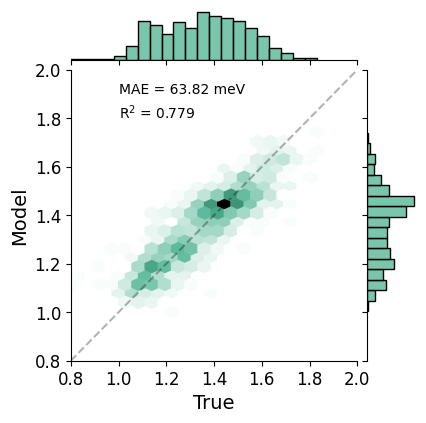

In [241]:
df_l=pd.DataFrame({'True':target,'Model':t_linear})
g=sns.jointplot(df_l,x='True',y='Model', kind="hex", color="#4CB391")
g.fig.set_size_inches((4,4))
llim,ulim=0.8,2
plt.plot([llim,ulim],[llim,ulim],c='k',ls='--',alpha=0.3)
plt.xlim([llim,ulim])
plt.ylim([llim,ulim])
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('True',fontsize=14)
plt.ylabel('Model',fontsize=14)
plt.text(1,1.9,'MAE = '+str(np.round(mean_absolute_error(target,t_linear),5)*1000)+' meV')
plt.text(1,1.8,'R$^2$ = '+str(np.round(r2_score(target,t_linear),3)))
plt.show()

## Load pre-trained GBR model and test model on unseen data

In [210]:
gbr_model = pickle.load(open('EnsembleGBR.sav', 'rb'))
t_gbr=gbr_model.predict(features_std)

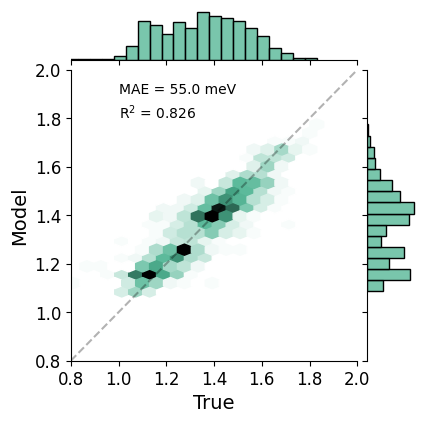

In [240]:
df_l=pd.DataFrame({'True':target,'Model':t_gbr})
g=sns.jointplot(df_l,x='True',y='Model', kind="hex", color="#4CB391")
g.fig.set_size_inches((4,4))
llim,ulim=0.8,2
plt.plot([llim,ulim],[llim,ulim],c='k',ls='--',alpha=0.3)
plt.xlim([llim,ulim])
plt.ylim([llim,ulim])
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('True',fontsize=14)
plt.ylabel('Model',fontsize=14)
plt.text(1,1.9,'MAE = '+str(np.round(mean_absolute_error(target,t_gbr),3)*1000)+' meV')
plt.text(1,1.8,'R$^2$ = '+str(np.round(r2_score(target,t_gbr),3)))
plt.show()